In [68]:
# Data Analysing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
census = pd.read_csv('adult.csv', skipinitialspace = True)

In [70]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
census["workclass"] = census["workclass"].replace("?", "Other")
       
census["occupation"] = census["occupation"].replace("?", "Other")
census["country"] = census["country"].replace("?", "Other")

In [5]:
census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [6]:
census["occupation"].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Other', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [7]:
# Dropping Duplicates
census.drop_duplicates(inplace=True)

In [8]:
#census["country"].unique()

# EDA

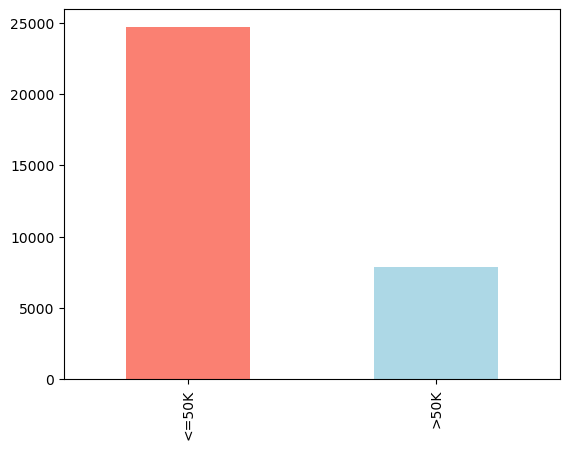

In [9]:
census["salary"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"]);

In [10]:
pd.crosstab(census["salary"], census["marital-status"])

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
salary,,,,,,,
<=50K,3978,13,8280,384,10176,959,908
>50K,463,10,6690,34,491,66,85


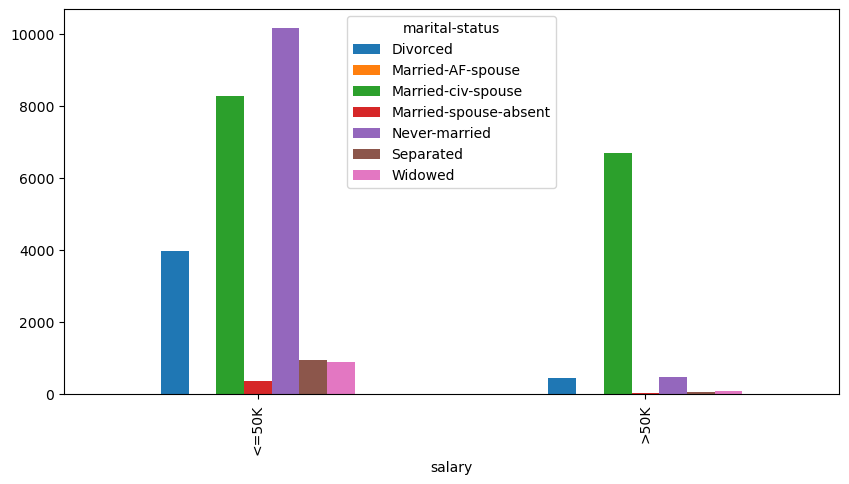

In [11]:
pd.crosstab(census["salary"], census["marital-status"]).plot(kind = "bar", figsize = (10,5));

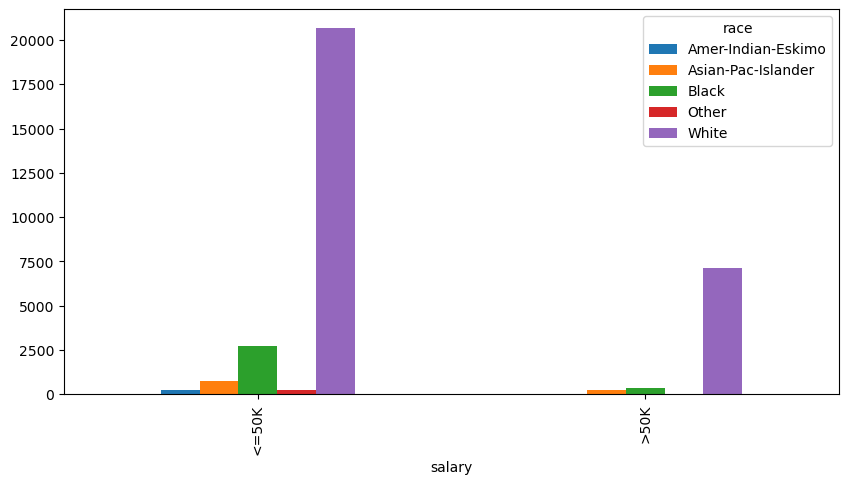

In [12]:
pd.crosstab(census["salary"], census["race"]).plot(kind = "bar", figsize = (10,5));

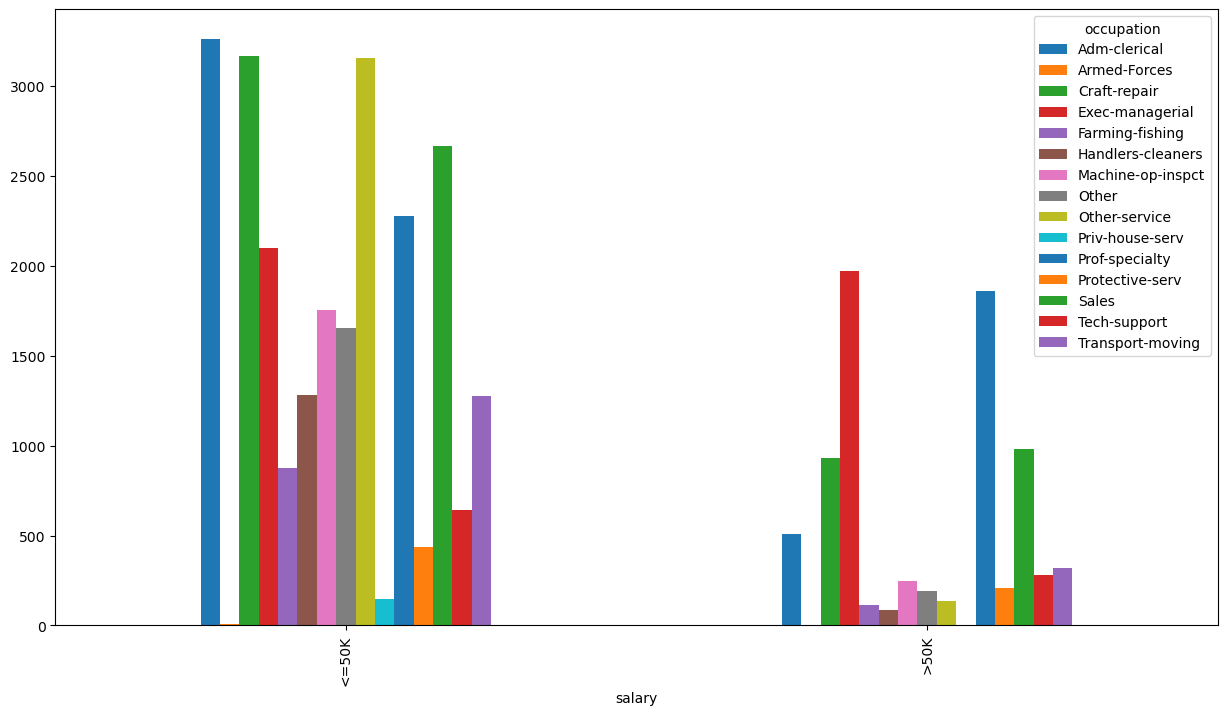

In [13]:
pd.crosstab(census["salary"], census["occupation"]).plot(kind = "bar", figsize = (15,8));

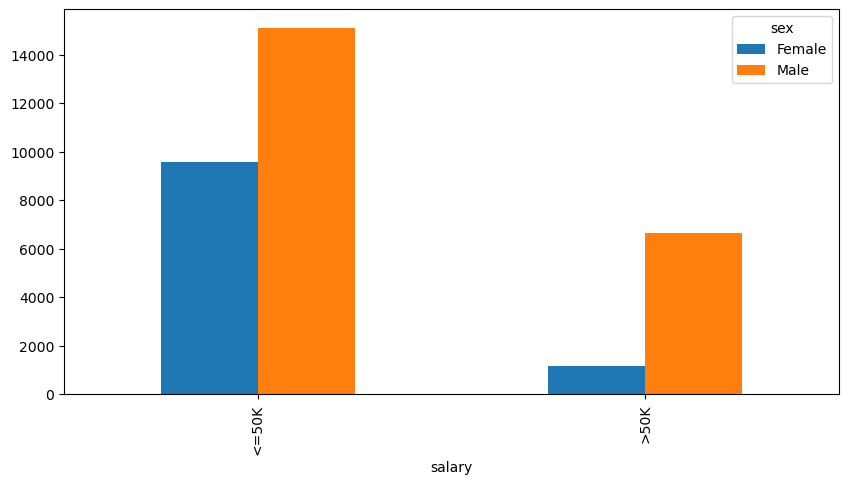

In [14]:
pd.crosstab(census["salary"], census["sex"]).plot(kind = "bar", figsize = (10,5));

### After conversion :
- '<=50K' : 0
- '>50K' : 1

# Data Conversion

In [50]:
# converting categorical data into numeric :
def to_numeric(col_name):
    col_name = col_name.replace(" ", "")
    a = list(col_name.unique())
    
    for i in a:
        col_name = col_name.replace(i, a.index(i))
    return col_name

# list of categorical columns
categorical_columns = ['workclass', 'education',
       'marital-status', 'occupation', 'relationship', 'sex', 'country', 'salary']

for i in categorical_columns:
    census[i] = to_numeric(census[i])


In [16]:
#census.drop("capital-gain", axis =1, inplace = True)
#census.drop("capital-loss", axis = 1, inplace = True)
#census.drop("country", axis = 1, inplace = True)
#census.drop("race", axis = 1, inplace = True)

# Spilting the data

In [17]:
x = census.drop("salary", axis = 1)
y = census["salary"]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fitting the Model 

In [51]:
# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [52]:
models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier(),
         "Decision Tree" : DecisionTreeClassifier(),
         "SVC" : SVC(),
         "Discriminant Analysis" : LinearDiscriminantAnalysis(),
         "XGBoost" : XGBClassifier()}

def fit_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluate given models 
    """
    np.random.seed(165)
    
    model_score = {}
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_score[name]= model.score(x_test, y_test)
    return model_score

In [53]:
fit_score(models = models,
         x_train= x_train,
         x_test = x_test,
         y_train = y_train,
         y_test = y_test)

C:\Users\Purna\Project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Purna\Project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:50:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'Logistic Regression': 0.7862630608481869,
 'KNN': 0.7679778733866011,
 'Random Forest': 0.8474185617701291,
 'Decision Tree': 0.8083896742470805,
 'SVC': 0.7818070067609096,
 'Discriminant Analysis': 0.8056238475722188,
 'XGBoost': 0.866318377381684}

In [54]:
# Moving Ahead with RandomForest and XGBoost

rf = RandomForestClassifier()
xgb = XGBClassifier()

In [55]:

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

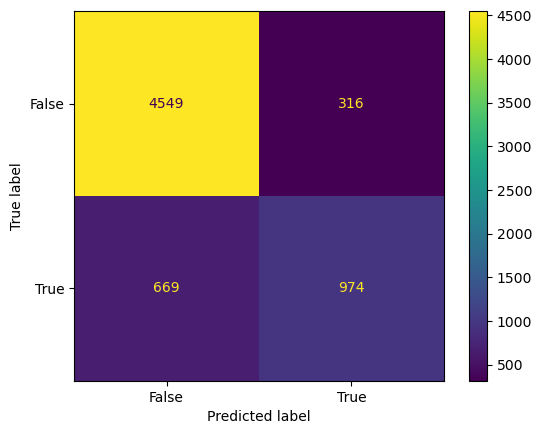

In [56]:
from sklearn import metrics
confusion_rf = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_rf, display_labels = [False, True])

cm_display.plot()
plt.show()

C:\Users\Purna\Project\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Purna\Project\env\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:52:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


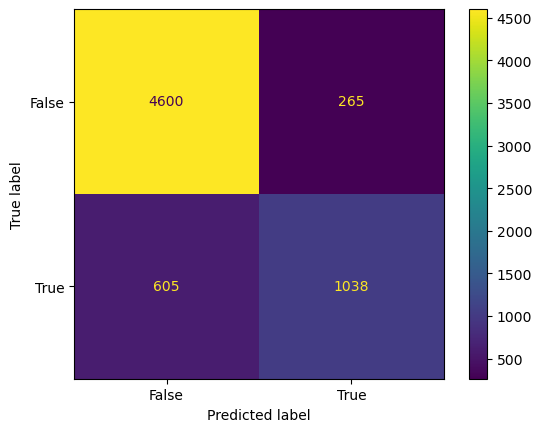

In [57]:
xgb.fit(x_train, y_train)
y_pred1 = xgb.predict(x_test)

confusion_xgb = metrics.confusion_matrix(y_test, y_pred1)
cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_xgb, display_labels = [False, True])

cm_display1.plot()
plt.show();

In [58]:
tree = rf.estimators_[99]

In [59]:
rf_grid = {"n_estimators" :np.arange(10,500,10),
          "max_depth" : np.arange(10,500,10),
          "min_samples_split" : np.arange(10,500,10),
          "min_samples_leaf" : np.arange(1,300,2),
          "max_features" : ['auto','sqrt', 'log2'],
          "criterion" :['gini','entropy']}

In [60]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rs_model = RandomizedSearchCV(RandomForestClassifier(n_jobs = -1,
                                                   random_state = 42),
                             param_distributions = rf_grid,
                             n_iter = 20,
                             cv = 2,
                             verbose = True)

In [61]:
%%time
rs_model.fit(x_train,y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


C:\Users\Purna\Project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Purna\Project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Purna\Project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default valu

CPU times: total: 14.2 s
Wall time: 25.6 s


RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 49...
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490])},
                   verbose=True)

In [62]:
rs_model.best_estimator_

RandomForestClassifier(max_depth=290, min_samples_leaf=7, min_samples_split=230,
                       n_estimators=130, n_jobs=-1, random_state=42)

In [63]:
rs_model.score(x_test, y_test)

0.8518746158574063

In [64]:
ideal = rs_model.best_estimator_

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred=ideal.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print((classification_report(y_test,y_pred)))

[[4651  214]
 [ 750  893]]
Accuracy Score 0.8518746158574063
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4865
           1       0.81      0.54      0.65      1643

    accuracy                           0.85      6508
   macro avg       0.83      0.75      0.78      6508
weighted avg       0.85      0.85      0.84      6508



In [34]:
from sklearn.model_selection import GridSearchCV

grid = {
    "n_estimators" : [rs_model.best_params_["n_estimators"],
                     rs_model.best_params_["n_estimators"]-100,
                     rs_model.best_params_["n_estimators"]+100,
                     rs_model.best_params_["n_estimators"]+300],
          "max_depth" : [rs_model.best_params_["max_depth"]],
          "min_samples_split" : [rs_model.best_params_["min_samples_split"]],
          "min_samples_leaf" : [rs_model.best_params_["min_samples_leaf"],
                               rs_model.best_params_["min_samples_leaf"]+2,
                                rs_model.best_params_["min_samples_leaf"]+7,
                               rs_model.best_params_["min_samples_leaf"]+11,
                               rs_model.best_params_["min_samples_leaf"]-5,
                               rs_model.best_params_["min_samples_leaf"]-2,
                               rs_model.best_params_["min_samples_leaf"]+9,
                               rs_model.best_params_["min_samples_leaf"]+28,
                               rs_model.best_params_["min_samples_leaf"]+16,
                               rs_model.best_params_["min_samples_leaf"]-14],
          "max_features" : [rs_model.best_params_["max_features"]],
                           
          "criterion" :[rs_model.best_params_["criterion"]]
}

In [35]:
gs_model = GridSearchCV(RandomForestClassifier(n_jobs = -1,
                                                   random_state = 42),
                             param_grid = grid,
                             cv = 5,
                             verbose = True)

In [36]:
%%time
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\Purna\Project\env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Purna\Project\env\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\Purna\Project\env\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\Purna\Project\env\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call_

CPU times: total: 1min 20s
Wall time: 4min 35s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [290],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [7, 9, 14, 18, 2, 5, 16, 35, 23,
                                              -7],
                         'min_samples_split': [230],
                         'n_estimators': [130, 30, 230, 430]},
             verbose=True)

In [37]:
gs_model.score(x_test,y_test)

0.8515673017824217

In [38]:
ig = gs_model.best_estimator_

In [39]:
y_pred=ig.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print((classification_report(y_test,y_pred)))

[[4647  218]
 [ 748  895]]
Accuracy Score 0.8515673017824217
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4865
           1       0.80      0.54      0.65      1643

    accuracy                           0.85      6508
   macro avg       0.83      0.75      0.78      6508
weighted avg       0.85      0.85      0.84      6508



### The model with highest accuracy

In [43]:
x_test.shape

(6508, 14)

In [44]:

best_model = RandomForestClassifier(criterion ='entropy',
 max_depth= 29,
 max_features= 'auto',
 min_samples_leaf= 5,
 min_samples_split= 7,
 n_estimators= 640)
best_model.fit(x_train, y_train)

y_pred1=best_model.predict(x_test)
print(confusion_matrix(y_test,y_pred1))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred1)))
print((classification_report(y_test,y_pred1)))

C:\Users\Purna\Project\env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[[4607  258]
 [ 681  962]]
Accuracy Score 0.8557160417947142
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4865
           1       0.79      0.59      0.67      1643

    accuracy                           0.86      6508
   macro avg       0.83      0.77      0.79      6508
weighted avg       0.85      0.86      0.85      6508



In [41]:
best_model.score(x_test, y_test)

0.9005838967424709

# Moving Ahead with RandomForest with the best_model

In [42]:
import pickle
# Saving the model
model_file = open("model.pkl", 'wb') 
pickle.dump(best_model, model_file)
model_file.close()
loaded_RF_Model = pickle.load(open("model.pkl", 'rb'))
result = loaded_RF_Model.score(x_test, y_test)
print(result)

0.9005838967424709
